In [2]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [80]:
df = pd.read_csv('diabetes.csv')

df_full_size = len(df)
df = df.drop_duplicates()
print(f'Количество дубликатов в датасете: {df_full_size - len(df)}')
print(f"Отношение размеров кластеров: {sum(df['Outcome'] == 0) / sum(df['Outcome'] == 1)}")

Количество дубликатов в датасете: 0
Отношение размеров кластеров: 1.8656716417910448


In [419]:
df.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


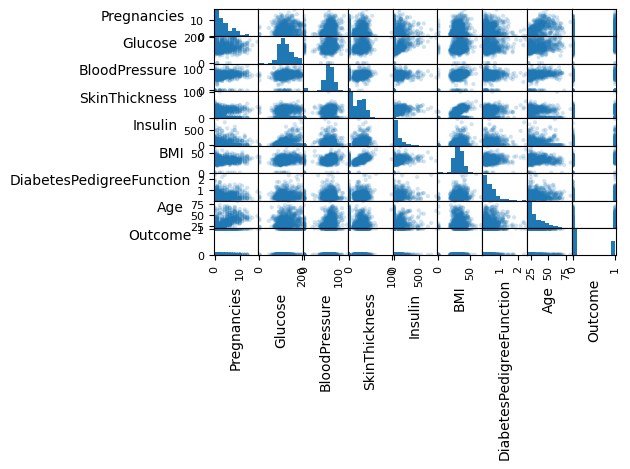

In [420]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [4]:
for column_name in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    column_values = df[column_name]
    column_mean_value = column_values[column_values != 0].mean()
    df[column_name] = column_values.mask(column_values == 0).fillna(column_mean_value)

df['Pregnancies'] = df['Pregnancies'] / 20;
df['Glucose'] = (df['Glucose'] - 40) / (250 - 40);
df['BloodPressure'] = (df['BloodPressure'] - 10) / (150 - 10);
df['SkinThickness'] = (df['SkinThickness'] - 4) / (120 - 4);
df['Insulin'] = (df['Insulin'] - 10) / (900 - 10);
df['BMI'] = (df['BMI'] - 10) / (80 - 10);
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'] / 2.5;
df['Age'] = (df['Age'] - 21) / (100 - 21);

In [5]:
class CustomLogisticRegression:
    def __init__(self, lr, n_iters):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.ones(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_predicted]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=.4, random_state=100427)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5, random_state=121)

In [75]:

iters_count = 100

sk_model = LogisticRegression(solver="liblinear", max_iter=iters_count)
sk_model.fit(X_val, y_val)
sk_preds_val = sk_model.predict(X_val)

custom_model = CustomLogisticRegression(lr=.03, n_iters=iters_count)
custom_model.fit(X_val, y_val)
custom_preds_val = custom_model.predict(X_val)

sklearn_f1_val = f1_score(y_val, sk_preds_val)
custom_f1_val = f1_score(y_val, custom_preds_val)

print('F1-score-val (sklearn):', round(sklearn_f1_val, 4))
print('F1-score-val (custom):', round(custom_f1_val, 4))

F1-score-val (sklearn): 0.5556
F1-score-val (custom): 0.6049


In [78]:
sk_preds_test = sk_model.predict(X_test)
custom_preds_test = custom_model.predict(X_test)

sklearn_f1_test = f1_score(y_test, sk_preds_test)
custom_f1_test = f1_score(y_test, custom_preds_test)

print('F1-score-test (sklearn):', round(sklearn_f1_test, 4))
print('F1-score-test (custom):', round(custom_f1_test, 4))

F1-score-test (sklearn): 0.5625
F1-score-test (custom): 0.6378
